# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk import word_tokenize
import re

# Exploratory Data Analysis

We needed to specify names for the columns in order to be able to read the dataset correctly otherwise parsing text containing delimiter symbol would raise error

Also there were two null objects in texts so we dropped them

In [2]:
df = pd.read_csv(
    'data/SmsCollection.csv',
    sep=';',
    names=['label', 'text'],
    skiprows=1,
    encoding='utf8').dropna()

df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5571
Data columns (total 2 columns):
label    5570 non-null object
text     5570 non-null object
dtypes: object(2)
memory usage: 130.5+ KB


In [4]:
sns.set(
    style='whitegrid',
    palette='Set2',
    font_scale=1.4,
    rc={"figure.figsize": [10, 6]})

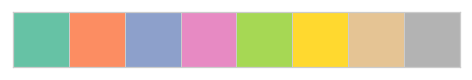

In [5]:
sns.palplot(sns.color_palette('Set2'))

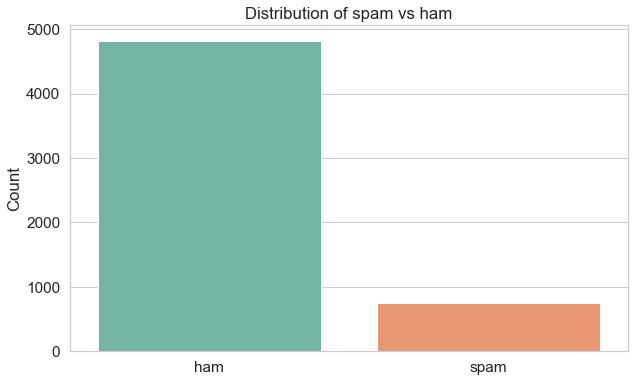

In [6]:
sns.countplot(df['label'])
plt.title('Distribution of spam vs ham')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

# Text Preprocessing

We clean the original textual data by removing non-alphanumeric characters

In [7]:
# remove all non-alphanumeric characters
df['text_processed'] = df['text'].apply(
    lambda s: re.sub(r'[^A-Za-z0-9 ]', '', s))

# remove stop words
# df['text_processed'] = df['text'].apply(lambda s: ' '.join(word for word in s.split() if word not in stop_words))


In [8]:
print('Before:\n' + df['text'][3] + '\n\nAfter:\n' + df['text_processed'][3])


Before:
U dun say so early hor... U c already then say...

After:
U dun say so early hor U c already then say


# Feature Engineering

In [9]:
print('Words:\n', word_tokenize(df['text_processed'][3]))
print('Count:\n', len(word_tokenize(df['text_processed'][3])))

Words:
 ['U', 'dun', 'say', 'so', 'early', 'hor', 'U', 'c', 'already', 'then', 'say']
Count:
 11


In [10]:
# number of words in text
df['words_count'] = df.apply(lambda row: len(word_tokenize(row['text_processed'])), axis=1)

df.head()


,label,text,text_processed,words_count
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,20
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,13


We can see the most common text size in a message

In [11]:
Counter(df['words_count']).most_common(25)

[(6, 440),
 (7, 384),
 (5, 370),
 (8, 343),
 (9, 307),
 (11, 249),
 (10, 240),
 (4, 230),
 (12, 191),
 (13, 168),
 (14, 159),
 (27, 150),
 (15, 149),
 (26, 140),
 (16, 130),
 (24, 130),
 (25, 130),
 (22, 129),
 (18, 128),
 (17, 127),
 (20, 123),
 (28, 112),
 (23, 111),
 (19, 105),
 (21, 104)]

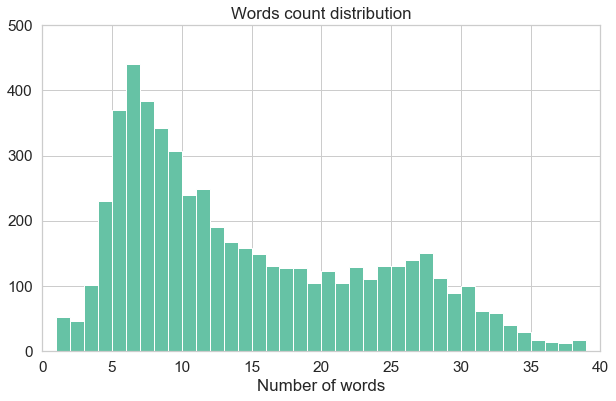

In [12]:
sns.distplot(
    df['words_count'], bins=np.arange(0, 40), kde=False, hist_kws={'alpha': 1})
plt.ylim(0, 500)
plt.xlim(0, 40)
plt.xlabel('Number of words')
plt.title('Words count distribution')
plt.show()
